### Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


### Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## 1. Importing Relevant Libraries

In [1]:
#Ignoring Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing EDA specific libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Data Understanding, Cleaning & EDA

In [3]:
#Reading the dataset provided
bikesharing = pd.read_csv("day.csv")

In [4]:
#Viewing top 5 rows of data
bikesharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
#Checking no. of rows & columns
bikesharing.shape

(730, 16)

In [6]:
#Checking columns data type and inspecting null values
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
#Checking statistical summary for numeric columns
bikesharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Checkpoint - It is evident that there are no null values present in the dataframe. Moreover, there are a total of 730 rows and 16 columns. However, from an analysis viewpoint not all of these columns will be required. To provide rationale behind removing some columns - Instant column will be dropped as it is just the serial numbers of data entries and doesn't provide any insights, dteday will be dropped as there are other columns providing info about the date, and casual and registered will be dropped as the target variable will be taken as "cnt" as it is the sum of both respectively, and the problem statement omits the fact that whether we need to keep casual/registered as target variable and hence their sum which includes both will be taken as the target variable and those would be dropped.

In [8]:
#Inspecting all column names of dataframe
bikesharing.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [9]:
#dropping irrelevant columns
bikesharing.drop(['instant', 'dteday','casual', 'registered'], axis=1, inplace=True)

In [10]:
#Inspecting dataframe without unnecessary columns
bikesharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


#### Converting data for season, mnth, weekday and weathersit from numerical into categorical variables as per the data dictionary

In [11]:
#Mapping seasons values to numerical data
bikesharing.season = bikesharing.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [12]:
#Mapping mnth values to numerical data
bikesharing.mnth = bikesharing.mnth.map({1:'january',2:'february',3:'march',4:'april',5:'may',6:'june',7:'july',8:'august',9:'september',10:'october',11:'november',12:'december'})

In [13]:
#Mapping weekday values to numerical data
bikesharing.weekday = bikesharing.weekday.map({0:"sunday",1:"monday",2:"tuesday",3:"wednesday",4:"thrusday",5:"friday",6:"saturday"})

In [14]:
#Mapping weathersit values to numerical data
bikesharing.weathersit = bikesharing.weathersit.map({1:'Clear',2:'Mist + Cloudy', 3:'Light Snow & Light Rain',4:'Heavy Rain & Ice'})

In [15]:
#inspecting changes made
bikesharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,january,0,monday,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,january,0,tuesday,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,january,0,wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,january,0,thrusday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,january,0,friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


#### Creating dummy variables for mapped categorical columns 

In [16]:
#Creating new df for categorical columns to create dummy var
dummycolumns = bikesharing[['season','mnth','weekday','weathersit']]

In [17]:
#Using get_dummies function in pandas to get n-1 dummy variables
dummycolumns = pd.get_dummies(dummycolumns,drop_first=True)

In [18]:
#Adding these to primary dataframe
bikesharing = pd.concat([bikesharing, dummycolumns], axis=1)

In [19]:
#Inspecting changes
bikesharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth_october,mnth_september,weekday_monday,weekday_saturday,weekday_sunday,weekday_thrusday,weekday_tuesday,weekday_wednesday,weathersit_Light Snow & Light Rain,weathersit_Mist + Cloudy
0,spring,0,january,0,monday,1,Mist + Cloudy,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,1
1,spring,0,january,0,tuesday,1,Mist + Cloudy,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,1
2,spring,0,january,0,wednesday,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,january,0,thrusday,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,january,0,friday,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [20]:
#inspecting new shape and changes made in df
bikesharing.shape

(730, 34)

In [21]:
bikesharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth_october,mnth_september,weekday_monday,weekday_saturday,weekday_sunday,weekday_thrusday,weekday_tuesday,weekday_wednesday,weathersit_Light Snow & Light Rain,weathersit_Mist + Cloudy
0,spring,0,january,0,monday,1,Mist + Cloudy,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,1
1,spring,0,january,0,tuesday,1,Mist + Cloudy,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,1
2,spring,0,january,0,wednesday,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,january,0,thrusday,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,january,0,friday,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [22]:
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   season                              730 non-null    object 
 1   yr                                  730 non-null    int64  
 2   mnth                                730 non-null    object 
 3   holiday                             730 non-null    int64  
 4   weekday                             730 non-null    object 
 5   workingday                          730 non-null    int64  
 6   weathersit                          730 non-null    object 
 7   temp                                730 non-null    float64
 8   atemp                               730 non-null    float64
 9   hum                                 730 non-null    float64
 10  windspeed                           730 non-null    float64
 11  cnt                                 730 non-n

#### Checkpoint - It can be observed now that n-1 dummy variables have been made for n levels of columns "season,mnth,weekday,weathersit" respectively

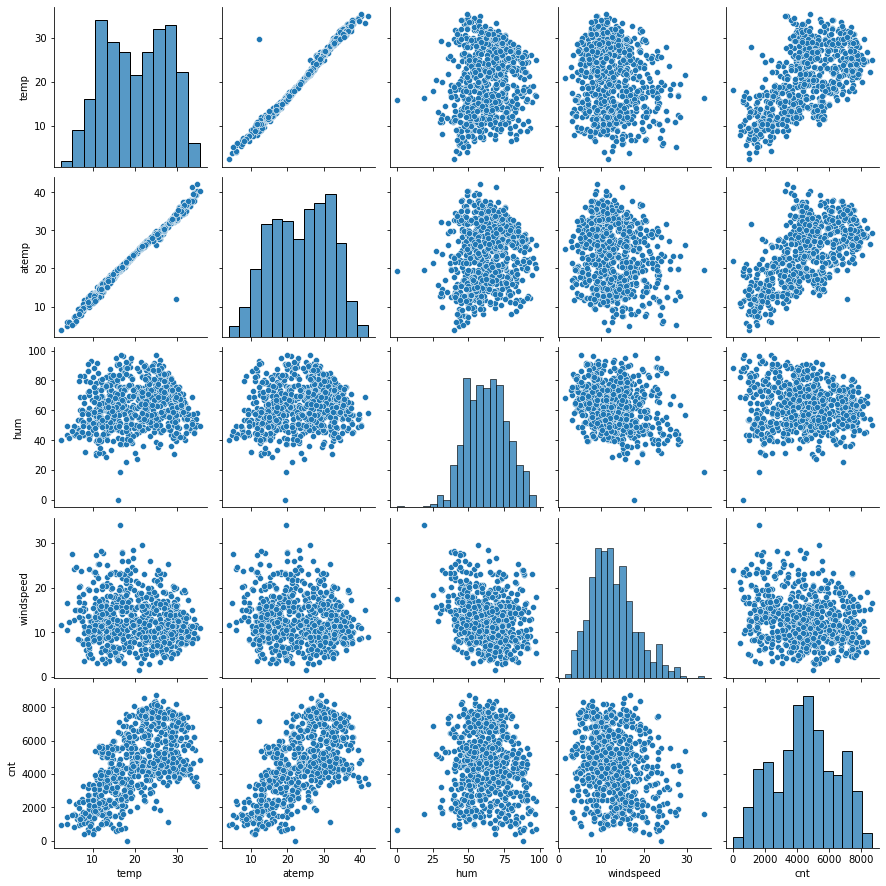

In [23]:
#Visualizing Numeric Columns 
sns.pairplot(data=bikesharing,vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

#### Checkpoint- From the above pairplots, it can be observed that there is a strong linear relationship between temp and atemp. Also, a linear relationship pattern can be observed for temp vs cnt and atemp vs cnt. This acts a precedent for creating a linear regression model.

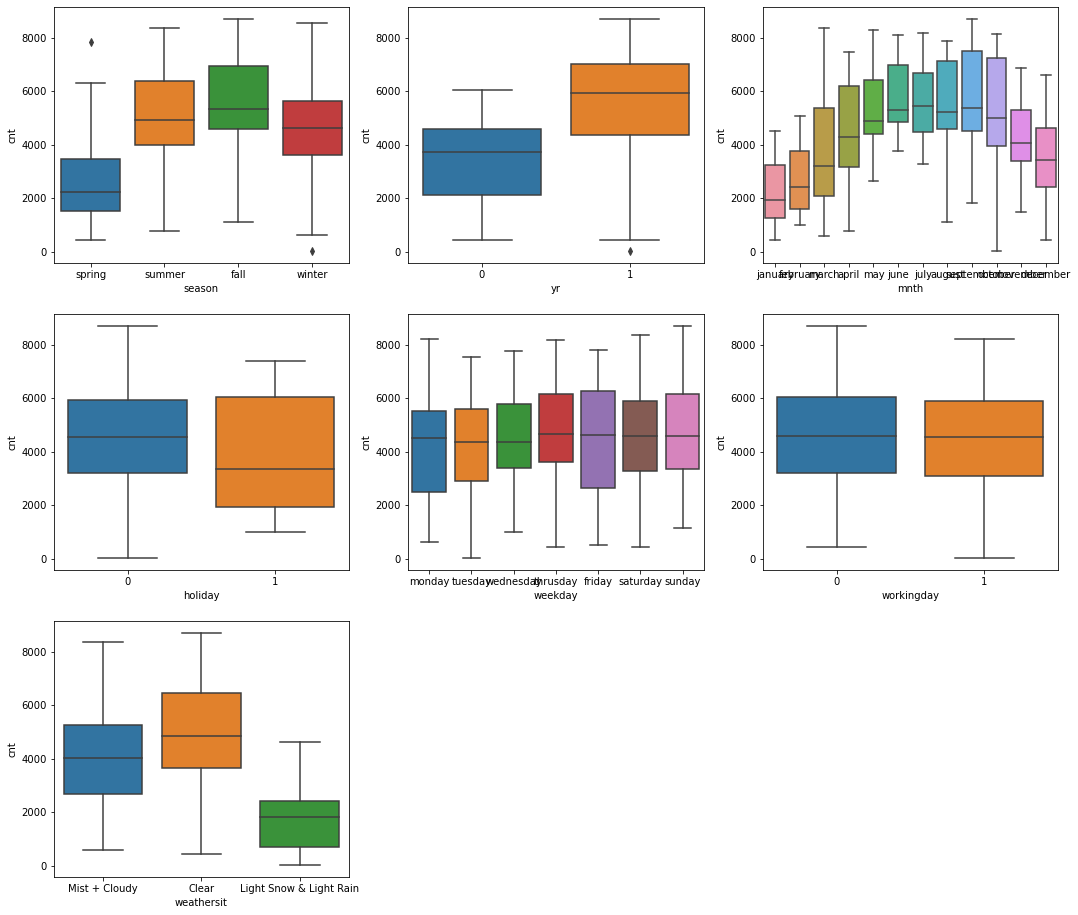

In [24]:
#Visualizing categorical variables cnt
categorical = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(18, 16))
for i in enumerate(categorical):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bikesharing, x=i[1], y='cnt')
plt.show()

#### Checkpoint - Following inferences can be drawn from the plotted boxplots -
1. In terms of season vs. count, some variance can be observed across the different levels, with fall having the highest median thats around 5000 whereas it is lowest for spring at about 2000. Hence, season seems to be a good predictor variable.
2. The total rented bikes i.e. cnt also significantly increased in 2019 as compared to 2018, hinting at yr to be relevant.
3. A lot of variance can be observed for different levels of mnth as well, with the period of may to september having higher median values, that is again hinting at this being a good predictor variable. This could be because these are pleasent months without much snow.
4. On days that are holidays, the median cnt can be observed to be less. 
5. The median value for all levels of weekday are similar at about 4500, hinting that it is not a decent predictor variable.
6. Workingday has similar median across both its levels and might not be a good predictor.
7. Weathersit has variance across its levels especially having a high median when it is clear but quite low when there is snow/rain. This seems to be in tandem with the observation from mnth.

In [25]:
#dropping the columns for which dummy variables were created to avoid repetition before checking correlation
bikesharing.drop(['season','mnth','weekday','weathersit'], axis=1, inplace=True)

In [26]:
#inspecting changes made in df
bikesharing.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_october,mnth_september,weekday_monday,weekday_saturday,weekday_sunday,weekday_thrusday,weekday_tuesday,weekday_wednesday,weathersit_Light Snow & Light Rain,weathersit_Mist + Cloudy
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


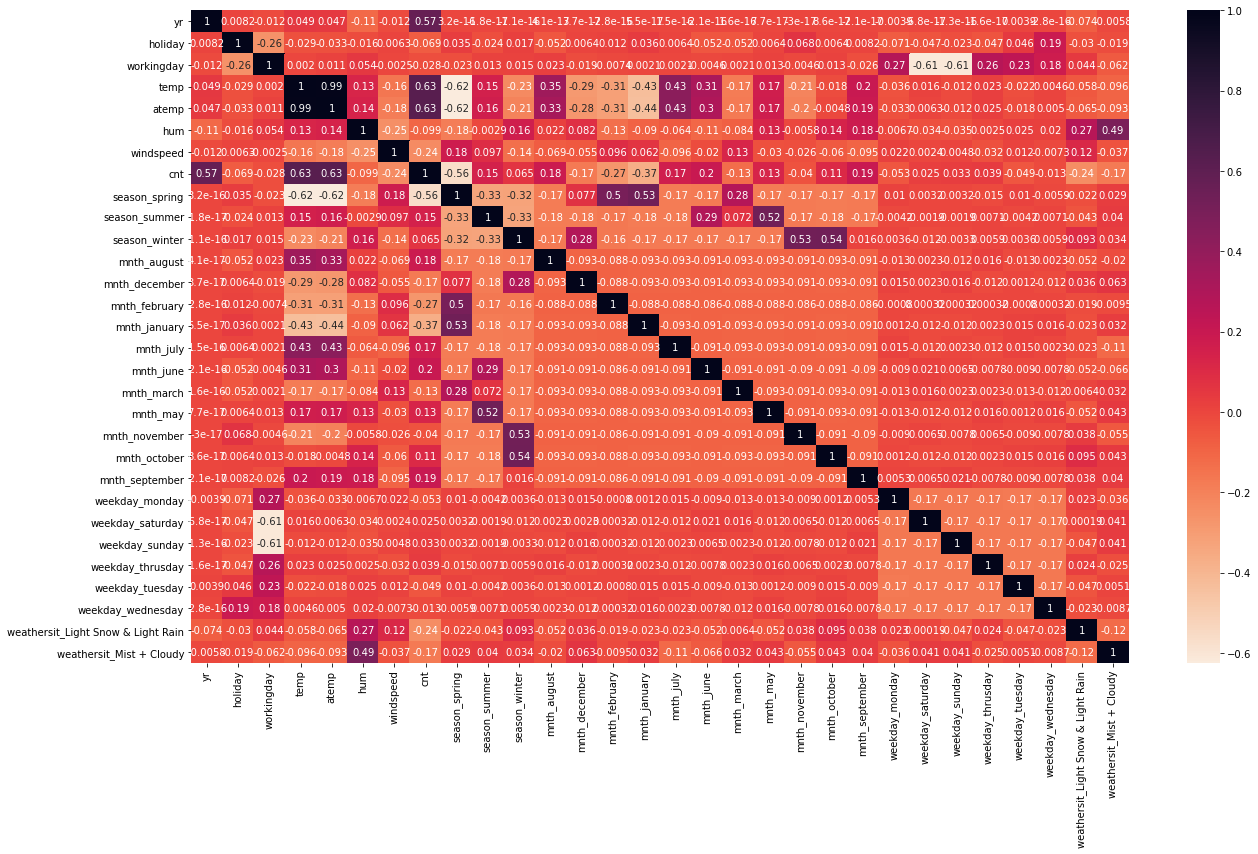

In [27]:
#Checking correlation between different variables for inspecting multicollinearity
plt.figure(figsize = (21, 12))
sns.heatmap(bikesharing.corr(), annot = True, cmap="rocket_r")
plt.show()

#### Checkpoint - By observing the heatmap, it can be observed that there is a correlation between target variable cnt and other predictors, but at the same time some multicollinearity can be observed amongst other predictor variables. Hence, this will be used as a reference point while building the model.

## 3. Importing Statistical Libraries for Model Prep and Building

In [28]:
#statsmodel and VIF are imported
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [29]:
#sklearn is imported along with specific modules for train-test split of dataframe, scaling the data, linear regression, RFE and R2 score respectively.
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

## 4. Splitting the data into train and test sets

In [30]:
df_train, df_test = train_test_split(bikesharing, train_size=0.7, random_state=100)

In [31]:
#inspecting shape of df_train
df_train.shape

(510, 30)

In [32]:
#inspecting shape of df_test
df_test.shape

(220, 30)

## 5. Rescaling of Features using MinMax from Sklearn

In [33]:
scaler = MinMaxScaler()

In [34]:
#inspecting columns to be rescaled
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_october,mnth_september,weekday_monday,weekday_saturday,weekday_sunday,weekday_thrusday,weekday_tuesday,weekday_wednesday,weathersit_Light Snow & Light Rain,weathersit_Mist + Cloudy
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0,13.803347,16.0977,72.9583,14.707907,1683,0,1,...,0,0,0,0,1,0,0,0,0,1


In [35]:
#inspecting columns names
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_august',
       'mnth_december', 'mnth_february', 'mnth_january', 'mnth_july',
       'mnth_june', 'mnth_march', 'mnth_may', 'mnth_november', 'mnth_october',
       'mnth_september', 'weekday_monday', 'weekday_saturday',
       'weekday_sunday', 'weekday_thrusday', 'weekday_tuesday',
       'weekday_wednesday', 'weathersit_Light Snow & Light Rain',
       'weathersit_Mist + Cloudy'],
      dtype='object')

In [36]:
# Scaling columns that are numerical and ignoring the dummy variables
numeric = ['temp', 'atemp', 'hum', 'windspeed',
       'cnt']
df_train[numeric] = scaler.fit_transform(df_train[numeric])

In [37]:
#inspecting scaled df
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_october,mnth_september,weekday_monday,weekday_saturday,weekday_sunday,weekday_thrusday,weekday_tuesday,weekday_wednesday,weathersit_Light Snow & Light Rain,weathersit_Mist + Cloudy
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,1,0,0,0,0,1


In [38]:
#inspecting statistical summary of df_train
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_october,mnth_september,weekday_monday,weekday_saturday,weekday_sunday,weekday_thrusday,weekday_tuesday,weekday_wednesday,weathersit_Light Snow & Light Rain,weathersit_Mist + Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 6. Building the Model

In [39]:
#Extracting the predictor and dependent variables
y_train = df_train.pop('cnt')
X_train = df_train

In [40]:
#Using Recursive Feature Elimination (RFE) to partially automate building the model, while keeping the number of output variables equal to 16
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 16)
rfe = rfe.fit(X_train, y_train)

In [41]:
# Inspecting the selected columns through RFE and their respective ranks
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 2),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_august', False, 9),
 ('mnth_december', True, 1),
 ('mnth_february', True, 1),
 ('mnth_january', True, 1),
 ('mnth_july', True, 1),
 ('mnth_june', False, 11),
 ('mnth_march', False, 14),
 ('mnth_may', False, 8),
 ('mnth_november', True, 1),
 ('mnth_october', False, 12),
 ('mnth_september', True, 1),
 ('weekday_monday', False, 7),
 ('weekday_saturday', False, 4),
 ('weekday_sunday', False, 5),
 ('weekday_thrusday', False, 13),
 ('weekday_tuesday', False, 6),
 ('weekday_wednesday', False, 10),
 ('weathersit_Light Snow & Light Rain', True, 1),
 ('weathersit_Mist + Cloudy', True, 1)]

In [42]:
# Creating a placeholder for columns that are supported by RFE
rfecol = X_train.columns[rfe.support_]
rfecol

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_december', 'mnth_february',
       'mnth_january', 'mnth_july', 'mnth_november', 'mnth_september',
       'weathersit_Light Snow & Light Rain', 'weathersit_Mist + Cloudy'],
      dtype='object')

In [43]:
#inspecting columns not supported
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'mnth_august', 'mnth_june', 'mnth_march',
       'mnth_may', 'mnth_october', 'weekday_monday', 'weekday_saturday',
       'weekday_sunday', 'weekday_thrusday', 'weekday_tuesday',
       'weekday_wednesday'],
      dtype='object')

In [44]:
# Creating new train dataframe with the RFE selected columns
X_train_rfecol = X_train[rfecol]

In [45]:
#inspecting changes
X_train_rfecol.head()

,yr,holiday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_december,mnth_february,mnth_january,mnth_july,mnth_november,mnth_september,weathersit_Light Snow & Light Rain,weathersit_Mist + Cloudy
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,0,1,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,0,1
728,1,0,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,0,1
111,0,0,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,0,0,1


#### Building Model 1 (Checkpoint - From here on features would be eliminated manually basis p value and VIF using stats model)

In [46]:
#Adding a constant
X_train_rfecol = sm.add_constant(X_train_rfecol)

In [47]:
# Creating the first fitted model
lm1 = sm.OLS(y_train,X_train_rfecol).fit()

In [48]:
#Inspecting the obtained parameters
lm1.params

const                                 0.331264
yr                                    0.230779
holiday                              -0.088651
temp                                  0.465666
hum                                  -0.160157
windspeed                            -0.189925
season_spring                        -0.051504
season_summer                         0.039051
season_winter                         0.100192
mnth_december                        -0.044634
mnth_february                        -0.035483
mnth_january                         -0.062420
mnth_july                            -0.054275
mnth_november                        -0.043519
mnth_september                        0.073955
weathersit_Light Snow & Light Rain   -0.247892
weathersit_Mist + Cloudy             -0.054596
dtype: float64

In [49]:
#Inspecting summary for the first linear regression model built 
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     169.0
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          2.94e-188
Time:                        18:41:54   Log-Likelihood:                 515.57
No. Observations:                 510   AIC:                            -997.1
Df Residuals:                     493   BIC:                            -925.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.3313      0.037      9.023      0.000       0.259       0.403
yr                                     0.2308      0.008     28.570      0.000       0.215       0.247
holiday                               -0.0887      0.026     -3.462      0.001      -0.139      -0.038
temp                                   0.4657      0.038     12.188      0.000       0.391       0.541
hum                                   -0.1602      0.038     -4.242      0.000      -0.234      -0.086
windspeed                             -0.1899      0.026     -7.371      0.000      -0.241      -0.139
season_spring                         -0.0515      0.022     -2.336      0.020      -0.095      -0.008
season_summer                          0.0391      0.015      2.530      0.012       0.009       0.069
season_winter                          0.1002      0.018      5.560      0.000       0.065       0.136
mnth_december                         -0.0446      0.018     -2.431      0.015      -0.081      -0.009
mnth_february                         -0.0355      0.022     -1.636      0.102      -0.078       0.007
mnth_january                          -0.0624      0.022     -2.901      0.004      -0.105      -0.020
mnth_july                             -0.0543      0.018     -2.980      0.003      -0.090      -0.018
mnth_november                         -0.0435      0.019     -2.289      0.023      -0.081      -0.006
mnth_september                         0.0740      0.017      4.378      0.000       0.041       0.107
weathersit_Light Snow & Light Rain    -0.2479      0.026     -9.395      0.000      -0.300      -0.196
weathersit_Mist + Cloudy              -0.0546      0.010     -5.231      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       71.068   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.175
Skew:                          -0.723   Prob(JB):                     4.10e-38
Kurtosis:                       5.451   Cond. No.                         21.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
# Inspecting VIF for this modelto check for multicollinearity
vif = pd.DataFrame()
vif['Features'] = X_train_rfecol.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfecol.values, i) for i in range(X_train_rfecol.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,85.71
6,season_spring,5.69
3,temp,4.73
8,season_winter,3.84
7,season_summer,2.82
11,mnth_january,2.37
4,hum,1.92
10,mnth_february,1.86
13,mnth_november,1.81
9,mnth_december,1.66


In [51]:
#dropping const and storing it in a new df to further check vif as vif of const is very high
X_new = X_train_rfecol.drop(['const'],axis =1)

In [52]:
# Rechecking VIF
vif = pd.DataFrame()
vif['Features'] = X_new.columns
vif['VIF'] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,31.52
2,temp,18.33
5,season_spring,5.45
4,windspeed,4.73
7,season_winter,4.07
6,season_summer,2.82
10,mnth_january,2.38
15,weathersit_Mist + Cloudy,2.33
0,yr,2.09
9,mnth_february,1.92


#### Building Model 2 (Checkpoint - This time 'hum' will be dropped as it has a high VIF of 31.52 i.e. greater than 5 clearly!)

In [53]:
#dropping humidity column
X_train_rfe2 = X_train_rfecol.drop(['hum'], axis=1)

In [54]:
# Creating the second fitted model
lm2 = sm.OLS(y_train,X_train_rfe2).fit()

In [55]:
#Inspecting parameters for this model
lm2.params

const                                 0.258654
yr                                    0.234807
holiday                              -0.089119
temp                                  0.422102
windspeed                            -0.160201
season_spring                        -0.060528
season_summer                         0.031424
season_winter                         0.085213
mnth_december                        -0.052670
mnth_february                        -0.038544
mnth_january                         -0.070566
mnth_july                            -0.049058
mnth_november                        -0.044735
mnth_september                        0.067180
weathersit_Light Snow & Light Rain   -0.292659
weathersit_Mist + Cloudy             -0.080039
dtype: float64

In [56]:
#Inspecting model summary
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     173.1
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          1.44e-185
Time:                        18:41:54   Log-Likelihood:                 506.43
No. Observations:                 510   AIC:                            -980.9
Df Residuals:                     494   BIC:                            -913.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.2587      0.033      7.830      0.000       0.194       0.324
yr                                     0.2348      0.008     28.781      0.000       0.219       0.251
holiday                               -0.0891      0.026     -3.421      0.001      -0.140      -0.038
temp                                   0.4221      0.037     11.277      0.000       0.349       0.496
windspeed                             -0.1602      0.025     -6.353      0.000      -0.210      -0.111
season_spring                         -0.0605      0.022     -2.712      0.007      -0.104      -0.017
season_summer                          0.0314      0.016      2.015      0.044       0.001       0.062
season_winter                          0.0852      0.018      4.741      0.000       0.050       0.121
mnth_december                         -0.0527      0.019     -2.835      0.005      -0.089      -0.016
mnth_february                         -0.0385      0.022     -1.749      0.081      -0.082       0.005
mnth_january                          -0.0706      0.022     -3.238      0.001      -0.113      -0.028
mnth_july                             -0.0491      0.018     -2.654      0.008      -0.085      -0.013
mnth_november                         -0.0447      0.019     -2.314      0.021      -0.083      -0.007
mnth_september                         0.0672      0.017      3.927      0.000       0.034       0.101
weathersit_Light Snow & Light Rain    -0.2927      0.025    -11.899      0.000      -0.341      -0.244
weathersit_Mist + Cloudy              -0.0800      0.009     -9.213      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       73.963   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.022
Skew:                          -0.740   Prob(JB):                     6.65e-41
Kurtosis:                       5.552   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
#dropping const
X_new = X_train_rfe2.drop(['const'],axis =1)

In [58]:
# Inspecting VIF
vif = pd.DataFrame()
vif['Features'] = X_new.columns
vif['VIF'] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.22
3,windspeed,4.67
4,season_spring,4.33
6,season_winter,2.99
5,season_summer,2.24
9,mnth_january,2.21
0,yr,2.08
8,mnth_february,1.88
11,mnth_november,1.83
10,mnth_july,1.60


#### Building Model 3 (Checkpoint - Since p value of mnth_february is quite high, it will be dropped next)

In [59]:
#dropping mnth_february column
X_train_rfe3 = X_train_rfe2.drop(['mnth_february'], axis=1)

In [60]:
# Creating the third fitted model
lm3 = sm.OLS(y_train,X_train_rfe3).fit()

In [61]:
#Inspecting parameters for this model
lm3.params

const                                 0.245029
yr                                    0.234455
holiday                              -0.091776
temp                                  0.438717
windspeed                            -0.158482
season_spring                        -0.071257
season_summer                         0.034890
season_winter                         0.086883
mnth_december                        -0.042806
mnth_january                         -0.050008
mnth_july                            -0.050046
mnth_november                        -0.039513
mnth_september                        0.068730
weathersit_Light Snow & Light Rain   -0.291749
weathersit_Mist + Cloudy             -0.080073
dtype: float64

In [62]:
#Inspecting model summary
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          4.75e-186
Time:                        18:41:54   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.2450      0.032      7.618      0.000       0.182       0.308
yr                                     0.2345      0.008     28.687      0.000       0.218       0.251
holiday                               -0.0918      0.026     -3.522      0.000      -0.143      -0.041
temp                                   0.4387      0.036     12.093      0.000       0.367       0.510
windspeed                             -0.1585      0.025     -6.276      0.000      -0.208      -0.109
season_spring                         -0.0713      0.021     -3.314      0.001      -0.113      -0.029
season_summer                          0.0349      0.015      2.251      0.025       0.004       0.065
season_winter                          0.0869      0.018      4.831      0.000       0.052       0.122
mnth_december                         -0.0428      0.018     -2.413      0.016      -0.078      -0.008
mnth_january                          -0.0500      0.018     -2.719      0.007      -0.086      -0.014
mnth_july                             -0.0500      0.019     -2.703      0.007      -0.086      -0.014
mnth_november                         -0.0395      0.019     -2.064      0.040      -0.077      -0.002
mnth_september                         0.0687      0.017      4.015      0.000       0.035       0.102
weathersit_Light Snow & Light Rain    -0.2917      0.025    -11.840      0.000      -0.340      -0.243
weathersit_Mist + Cloudy              -0.0801      0.009     -9.198      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       69.242   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.476
Skew:                          -0.698   Prob(JB):                     5.81e-38
Kurtosis:                       5.473   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
#dropping const
X_new = X_train_rfe3.drop(['const'],axis =1)

In [64]:
# Inspecting VIF
vif = pd.DataFrame()
vif['Features'] = X_new.columns
vif['VIF'] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,season_winter,2.95
4,season_spring,2.89
5,season_summer,2.24
0,yr,2.07
10,mnth_november,1.81
8,mnth_january,1.66
9,mnth_july,1.59
13,weathersit_Mist + Cloudy,1.57


#### Building Model 4 (Checkpoint - This time mnth_november is chosen to be dropped as it has a borderline high p value)

In [65]:
#dropping mnth_november column
X_train_rfe4 = X_train_rfe3.drop(['mnth_november'], axis=1)

In [66]:
# Creating the fourth fitted model
lm4 = sm.OLS(y_train,X_train_rfe4).fit()

In [67]:
#Inspecting parameters for this model
lm4.params

const                                 0.228272
yr                                    0.234275
holiday                              -0.098193
temp                                  0.458108
windspeed                            -0.159364
season_spring                        -0.063192
season_summer                         0.040370
season_winter                         0.077434
mnth_december                        -0.028270
mnth_january                         -0.045128
mnth_july                            -0.049881
mnth_september                        0.074195
weathersit_Light Snow & Light Rain   -0.287829
weathersit_Mist + Cloudy             -0.079315
dtype: float64

In [68]:
#Inspecting model summary
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          2.74e-186
Time:                        18:41:54   Log-Likelihood:                 502.67
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     496   BIC:                            -918.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.2283      0.031      7.310      0.000       0.167       0.290
yr                                     0.2343      0.008     28.573      0.000       0.218       0.250
holiday                               -0.0982      0.026     -3.783      0.000      -0.149      -0.047
temp                                   0.4581      0.035     13.031      0.000       0.389       0.527
windspeed                             -0.1594      0.025     -6.291      0.000      -0.209      -0.110
season_spring                         -0.0632      0.021     -2.979      0.003      -0.105      -0.022
season_summer                          0.0404      0.015      2.635      0.009       0.010       0.070
season_winter                          0.0774      0.017      4.438      0.000       0.043       0.112
mnth_december                         -0.0283      0.016     -1.731      0.084      -0.060       0.004
mnth_january                          -0.0451      0.018     -2.467      0.014      -0.081      -0.009
mnth_july                             -0.0499      0.019     -2.686      0.007      -0.086      -0.013
mnth_september                         0.0742      0.017      4.373      0.000       0.041       0.108
weathersit_Light Snow & Light Rain    -0.2878      0.025    -11.677      0.000      -0.336      -0.239
weathersit_Mist + Cloudy              -0.0793      0.009     -9.089      0.000      -0.096      -0.062
==============================================================================
Omnibus:                       62.961   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.773
Skew:                          -0.660   Prob(JB):                     2.22e-32
Kurtosis:                       5.263   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
#dropping const
X_new = X_train_rfe4.drop(['const'],axis =1)

In [70]:
# Inspecting VIF
vif = pd.DataFrame()
vif['Features'] = X_new.columns
vif['VIF'] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.14
3,windspeed,4.62
4,season_spring,2.89
5,season_summer,2.24
0,yr,2.07
6,season_winter,2.05
8,mnth_january,1.65
9,mnth_july,1.59
12,weathersit_Mist + Cloudy,1.57
10,mnth_september,1.34


#### Building Model 5 (Checkpoint - mnth_december is chosen to be dropped as it has a high p value)

In [71]:
#dropping mnth_december column
X_train_rfe5 = X_train_rfe4.drop(['mnth_december'], axis=1)

In [72]:
# Creating the fifth fitted model
lm5 = sm.OLS(y_train,X_train_rfe5).fit()

In [73]:
#Inspecting parameters for this model
lm5.params

const                                 0.215392
yr                                    0.234283
holiday                              -0.096758
temp                                  0.472115
windspeed                            -0.154916
season_spring                        -0.061696
season_summer                         0.043385
season_winter                         0.075655
mnth_january                         -0.038259
mnth_july                            -0.050347
mnth_september                        0.076399
weathersit_Light Snow & Light Rain   -0.285425
weathersit_Mist + Cloudy             -0.079277
dtype: float64

In [74]:
#Inspecting model summary
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          8.14e-187
Time:                        18:41:54   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.2154      0.030      7.088      0.000       0.156       0.275
yr                                     0.2343      0.008     28.517      0.000       0.218       0.250
holiday                               -0.0968      0.026     -3.722      0.000      -0.148      -0.046
temp                                   0.4721      0.034     13.772      0.000       0.405       0.539
windspeed                             -0.1549      0.025     -6.135      0.000      -0.205      -0.105
season_spring                         -0.0617      0.021     -2.905      0.004      -0.103      -0.020
season_summer                          0.0434      0.015      2.845      0.005       0.013       0.073
season_winter                          0.0757      0.017      4.335      0.000       0.041       0.110
mnth_january                          -0.0383      0.018     -2.138      0.033      -0.073      -0.003
mnth_july                             -0.0503      0.019     -2.706      0.007      -0.087      -0.014
mnth_september                         0.0764      0.017      4.506      0.000       0.043       0.110
weathersit_Light Snow & Light Rain    -0.2854      0.025    -11.575      0.000      -0.334      -0.237
weathersit_Mist + Cloudy              -0.0793      0.009     -9.067      0.000      -0.096      -0.062
==============================================================================
Omnibus:                       59.886   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.021
Skew:                          -0.638   Prob(JB):                     4.79e-30
Kurtosis:                       5.174   Cond. No.                         17.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
#dropping const
X_new = X_train_rfe5.drop(['const'],axis =1)

In [76]:
# Inspecting VIF
vif = pd.DataFrame()
vif['Features'] = X_new.columns
vif['VIF'] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.13
3,windspeed,4.62
4,season_spring,2.75
5,season_summer,2.24
0,yr,2.07
6,season_winter,1.78
7,mnth_january,1.61
8,mnth_july,1.59
11,weathersit_Mist + Cloudy,1.56
9,mnth_september,1.34


#### Building Model 6 (Checkpoint - As temp is a seemingly more important factor in a business context than windspeed, windspeed shall be dropped as it has a borderline high VIF, and after this temp VIF would fall as well anyways)

In [77]:
#dropping windspeed column
X_train_rfe6 = X_train_rfe5.drop(['windspeed'], axis=1)

In [78]:
# Creating the sixth fitted model
lm6 = sm.OLS(y_train,X_train_rfe6).fit()

In [79]:
#Inspecting parameters for this model
lm6.params

const                                 0.158636
yr                                    0.233017
holiday                              -0.099899
temp                                  0.491416
season_spring                        -0.073432
season_summer                         0.034410
season_winter                         0.079091
mnth_january                         -0.024026
mnth_july                            -0.051272
mnth_september                        0.081030
weathersit_Light Snow & Light Rain   -0.300152
weathersit_Mist + Cloudy             -0.077849
dtype: float64

In [80]:
#Inspecting model summary
lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     212.6
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          3.83e-180
Time:                        18:41:54   Log-Likelihood:                 482.52
No. Observations:                 510   AIC:                            -941.0
Df Residuals:                     498   BIC:                            -890.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.1586      0.030      5.289      0.000       0.100       0.218
yr                                     0.2330      0.009     27.382      0.000       0.216       0.250
holiday                               -0.0999      0.027     -3.710      0.000      -0.153      -0.047
temp                                   0.4914      0.035     13.894      0.000       0.422       0.561
season_spring                         -0.0734      0.022     -3.351      0.001      -0.116      -0.030
season_summer                          0.0344      0.016      2.188      0.029       0.004       0.065
season_winter                          0.0791      0.018      4.376      0.000       0.044       0.115
mnth_january                          -0.0240      0.018     -1.307      0.192      -0.060       0.012
mnth_july                             -0.0513      0.019     -2.659      0.008      -0.089      -0.013
mnth_september                         0.0810      0.018      4.617      0.000       0.047       0.116
weathersit_Light Snow & Light Rain    -0.3002      0.025    -11.804      0.000      -0.350      -0.250
weathersit_Mist + Cloudy              -0.0778      0.009     -8.596      0.000      -0.096      -0.060
==============================================================================
Omnibus:                       68.324   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.088
Skew:                          -0.692   Prob(JB):                     3.16e-37
Kurtosis:                       5.449   Cond. No.                         17.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
#dropping const
X_new = X_train_rfe6.drop(['const'],axis =1)

In [82]:
# Inspecting VIF
vif = pd.DataFrame()
vif['Features'] = X_new.columns
vif['VIF'] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.28
0,yr,2.07
3,season_spring,1.99
4,season_summer,1.94
6,mnth_january,1.60
7,mnth_july,1.59
5,season_winter,1.57
10,weathersit_Mist + Cloudy,1.56
8,mnth_september,1.34
9,weathersit_Light Snow & Light Rain,1.07


#### Building Model 7 (Checkpoint - mnth_january is chosen to be dropped as it has a high p value)

In [83]:
#dropping mnth_january column
X_train_rfe7 = X_train_rfe6.drop(['mnth_january'], axis=1)

In [84]:
# Creating the seventh fitted model
lm7 = sm.OLS(y_train,X_train_rfe7).fit()

In [85]:
#Inspecting parameters for this model
lm7.params

const                                 0.150081
yr                                    0.232598
holiday                              -0.100259
temp                                  0.502913
season_spring                        -0.076589
season_summer                         0.036651
season_winter                         0.082879
mnth_july                            -0.052338
mnth_september                        0.081182
weathersit_Light Snow & Light Rain   -0.298944
weathersit_Mist + Cloudy             -0.078458
dtype: float64

In [86]:
#Inspecting model summary
lm7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     233.3
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          5.71e-181
Time:                        18:41:55   Log-Likelihood:                 481.64
No. Observations:                 510   AIC:                            -941.3
Df Residuals:                     499   BIC:                            -894.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.1501      0.029      5.124      0.000       0.093       0.208
yr                                     0.2326      0.009     27.333      0.000       0.216       0.249
holiday                               -0.1003      0.027     -3.721      0.000      -0.153      -0.047
temp                                   0.5029      0.034     14.670      0.000       0.436       0.570
season_spring                         -0.0766      0.022     -3.514      0.000      -0.119      -0.034
season_summer                          0.0367      0.016      2.342      0.020       0.006       0.067
season_winter                          0.0829      0.018      4.642      0.000       0.048       0.118
mnth_july                             -0.0523      0.019     -2.715      0.007      -0.090      -0.014
mnth_september                         0.0812      0.018      4.623      0.000       0.047       0.116
weathersit_Light Snow & Light Rain    -0.2989      0.025    -11.756      0.000      -0.349      -0.249
weathersit_Mist + Cloudy              -0.0785      0.009     -8.669      0.000      -0.096      -0.061
==============================================================================
Omnibus:                       66.927   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.674
Skew:                          -0.678   Prob(JB):                     1.74e-36
Kurtosis:                       5.431   Cond. No.                         16.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
#dropping const
X_new = X_train_rfe7.drop(['const'],axis =1)

In [88]:
# Inspecting VIF
vif = pd.DataFrame()
vif['Features'] = X_new.columns
vif['VIF'] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.22
0,yr,2.06
4,season_summer,1.94
6,mnth_july,1.58
5,season_winter,1.57
9,weathersit_Mist + Cloudy,1.55
3,season_spring,1.40
7,mnth_september,1.34
8,weathersit_Light Snow & Light Rain,1.07
1,holiday,1.04


#### Building Model 8 (Checkpoint - season_summer is chosen to be dropped as it has the highest p value, even though not very high but is making the model to have extra variables while showing some insignifcance)

In [89]:
#dropping season_summer column
X_train_rfe8 = X_train_rfe7.drop(['season_summer'], axis=1)

In [90]:
# Creating the seventh fitted model
lm8 = sm.OLS(y_train,X_train_rfe8).fit()

In [91]:
#Inspecting parameters for this model
lm8.params

const                                 0.195172
yr                                    0.233180
holiday                              -0.100571
temp                                  0.469496
season_spring                        -0.112165
season_winter                         0.053423
mnth_july                            -0.068985
mnth_september                        0.065396
weathersit_Light Snow & Light Rain   -0.299283
weathersit_Mist + Cloudy             -0.078124
dtype: float64

In [92]:
#Inspecting model summary
lm8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     256.3
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          5.25e-181
Time:                        18:41:55   Log-Likelihood:                 478.85
No. Observations:                 510   AIC:                            -937.7
Df Residuals:                     500   BIC:                            -895.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.1952      0.022      8.802      0.000       0.152       0.239
yr                                     0.2332      0.009     27.291      0.000       0.216       0.250
holiday                               -0.1006      0.027     -3.716      0.000      -0.154      -0.047
temp                                   0.4695      0.031     14.995      0.000       0.408       0.531
season_spring                         -0.1122      0.016     -7.143      0.000      -0.143      -0.081
season_winter                          0.0534      0.013      4.197      0.000       0.028       0.078
mnth_july                             -0.0690      0.018     -3.833      0.000      -0.104      -0.034
mnth_september                         0.0654      0.016      4.015      0.000       0.033       0.097
weathersit_Light Snow & Light Rain    -0.2993      0.026    -11.717      0.000      -0.349      -0.249
weathersit_Mist + Cloudy              -0.0781      0.009     -8.594      0.000      -0.096      -0.060
==============================================================================
Omnibus:                       66.632   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.465
Skew:                          -0.661   Prob(JB):                     5.85e-38
Kurtosis:                       5.515   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
#dropping const
X_new = X_train_rfe8.drop(['const'],axis =1)

In [94]:
# Inspecting VIF
vif = pd.DataFrame()
vif['Features'] = X_new.columns
vif['VIF'] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,2.99
0,yr,2.05
8,weathersit_Mist + Cloudy,1.51
4,season_winter,1.33
5,mnth_july,1.33
3,season_spring,1.25
6,mnth_september,1.19
7,weathersit_Light Snow & Light Rain,1.06
1,holiday,1.04


### Checkpoint - Model 8 will be taken as the final linear regression model as this has 0 p values for all predictors, the VIF for each is lower than the threshold of 5 stating very less multi collinearity, while the R square and adjusted R square have good values being above 80% and not having much difference between them. Moreover number of predictor variables is less than 10.

## 7. Residual Analysis of training data set

In [95]:
# Checking for normal distribution of error terms
y_train_predict = lm8.predict(X_train_rfe8)

In [96]:
err = y_train - y_train_predict

Text(0.5, 0, 'Errors')

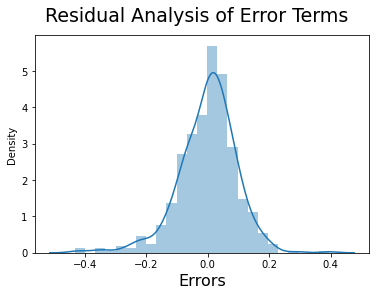

In [97]:
# Plotting distplot of error terms between predicted values and actual values of cnt
fig = plt.figure()
sns.distplot(err, bins = 25)
fig.suptitle('Residual Analysis of Error Terms', fontsize = 19)           
plt.xlabel('Errors', fontsize = 16) 

#### Checkpoint - It can be observed that the mean of the error terms are centering at 0 and they are normally distributed, hence, the assumptions for linear regression hold true

## 8. Making Predictions on the Test Set

In [98]:
# Scaling columns that are numerical in the test set to transorm it according to the train data set
numeric = ['temp', 'atemp', 'hum', 'windspeed',
       'cnt']
df_test[numeric] = scaler.fit_transform(df_test[numeric])

In [99]:
#inspecting scaled df
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_october,mnth_september,weekday_monday,weekday_saturday,weekday_sunday,weekday_thrusday,weekday_tuesday,weekday_wednesday,weathersit_Light Snow & Light Rain,weathersit_Mist + Cloudy
184,0,1,0,0.837241,0.778767,0.534223,0.149393,0.704300,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.911423,0.855132,0.470417,0.231142,0.725421,0,1,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.496221,0.492359,0.777843,0.443398,0.278853,0,0,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.890387,0.805661,0.236659,0.449707,0.545512,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.821739,0.749249,0.070765,0.682387,0.569148,0,1,...,0,0,0,1,0,0,0,0,0,0


In [100]:
#inspecting statistical summary of df_test
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_october,mnth_september,weekday_monday,weekday_saturday,weekday_sunday,weekday_thrusday,weekday_tuesday,weekday_wednesday,weathersit_Light Snow & Light Rain,weathersit_Mist + Cloudy
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.546074,0.530791,0.508362,0.418803,0.517923,0.254545,0.263636,...,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182
std,0.500809,0.187620,0.480828,0.248645,0.227648,0.200875,0.187683,0.239498,0.436599,0.441609,...,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.329310,0.333953,0.361079,0.284201,0.361045,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.545492,0.543153,0.491299,0.403318,0.520681,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.756414,0.719758,0.650989,0.523975,0.687956,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [101]:
#Extracting the predictor and dependent variables
y_test = df_test.pop('cnt')
X_test = df_test

In [102]:
# Adding constant to X_test
X_test = sm.add_constant(X_test)

In [103]:
#Using same variables that were used in the train data set to be used in the test data set
columns = X_train_rfe8.columns
X_test = X_test[columns]

In [104]:
#inspecting changes in test df
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   const                               220 non-null    float64
 1   yr                                  220 non-null    int64  
 2   holiday                             220 non-null    int64  
 3   temp                                220 non-null    float64
 4   season_spring                       220 non-null    uint8  
 5   season_winter                       220 non-null    uint8  
 6   mnth_july                           220 non-null    uint8  
 7   mnth_september                      220 non-null    uint8  
 8   weathersit_Light Snow & Light Rain  220 non-null    uint8  
 9   weathersit_Mist + Cloudy            220 non-null    uint8  
dtypes: float64(2), int64(2), uint8(6)
memory usage: 9.9 KB


In [105]:
y_test_predict = lm8.predict(X_test)

## 9. Evaluating the final model

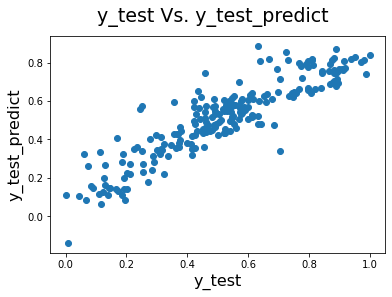

In [106]:
# Plotting a scatter plot between predicted and actual values of cnt for the test data
fig = plt.figure()
plt.scatter(y_test, y_test_predict)
fig.suptitle("y_test Vs. y_test_predict", fontsize=19)
plt.xlabel('y_test', fontsize=16)
plt.ylabel('y_test_predict', fontsize=16)
plt.show()

In [107]:
#R squared value Test between actual and predicted cnt values for test data
rsqr = r2_score(y_test, y_test_predict)
rsqr

0.804920533286689

In [108]:
#Adjusted R squared Value Test
# n = number of rows in X
n = X_test.shape[0]

# p = number of predictor variables
p = X_test.shape[1]

# Formula and Calculation of adjusted R squared
adjusted_rsqr = 1-(1-rsqr)*(n-1)/(n-p-1)
adjusted_rsqr

0.7955865875109325

In [109]:
#Mean Squared Error test
from sklearn.metrics import mean_squared_error
mean_sqr_err = mean_squared_error(y_test, y_test_predict)
mean_sqr_err

0.011138775160208772

#### Checkpoint - The R squared and adjusted R squared have less than 5% difference for test and train data stating that this is a good fitted model.

In [110]:
#Inspecting final model's parameters to build final equation of model
lm8.params

const                                 0.195172
yr                                    0.233180
holiday                              -0.100571
temp                                  0.469496
season_spring                        -0.112165
season_winter                         0.053423
mnth_july                            -0.068985
mnth_september                        0.065396
weathersit_Light Snow & Light Rain   -0.299283
weathersit_Mist + Cloudy             -0.078124
dtype: float64

### Final Equation of the chosen model for best fitted line

### cnt = 0.195172 + (yr * 0.233180) - (holiday * 0.100571)  + (temp * 0.469496) - (season_spring * 0.112165) + (season_winter * 0.053423)- (mnth_july * 0.068985)+ (mnth_september * 0.065396)- (weathersit_Light Snow & Light Rain * 0.299283) - (weathersit_Mist + Cloudy * 0.078124)
(* stands for multiplication!)

#### List of Final Predictor Variables
1. yr                                   
2. holiday                              
3. temp                                  
4. season_spring                        
5. season_winter                        
6. mnth_july                            
7. mnth_september                        
8. weathersit_Light Snow & Light Rain   
9. weathersit_Mist + Cloudy             

#### List of Positively Impacting Predictor Variables that will increase value of cnt - 
1. yr                                    
2. temp
3. season_winter
4. mnth_september                        

#### List of Negatively Impacting Predictor Variables that will decrease value of cnt - 
1. holiday
2. season_spring
3. mnth_july
4. weathersit_Light Snow & Light Rain
5. weathersit_Mist + Cloudy

### Final Remarks -
#### It can be noticed that the variable with the most predictive power having the highest coefficient is temp which has a coefficient of 0.469496 suggesting that temperature has a significant impact upon the count of total rental bikes. This is followed by weathersit_Light Snow & Light Rain with a coefficient of -0.299283 that impacts count of total bikes negatively and finallly by yr which has a coefficient of 0.233180 impacting the count of total rental bikes positively. The model is overall suggestive that the temperature, season, weather and holiday being important predictors in determining the count of total rental bikes respectively.